In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vencerlanz09/shells-or-pebbles-an-image-classification-dataset

 98% 192M/195M [00:07<00:00, 30.1MB/s]
100% 195M/195M [00:07<00:00, 28.1MB/s]


In [3]:
!unzip /content/shells-or-pebbles-an-image-classification-dataset.zip -d dataset_directory

Archive:  /content/shells-or-pebbles-an-image-classification-dataset.zip
  inflating: dataset_directory/Pebbles/Pebbles (1).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (10).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (100).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1000).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1001).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1002).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1003).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1004).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1005).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1006).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1007).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1008).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1009).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (101).jpg  
  inflating: dataset_directory/Pebbles/Pebbles (1010).jpg  
  inflating: dataset_directory/Peb

In [4]:
!unzip /content/shells-or-pebbles-an-image-classification-dataset.zip -d shells_or_pebbles_dataset

Archive:  /content/shells-or-pebbles-an-image-classification-dataset.zip
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (10).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (100).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1000).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1001).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1002).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1003).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1004).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1005).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1006).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1007).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1008).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pebbles (1009).jpg  
  inflating: shells_or_pebbles_dataset/Pebbles/Pe

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [6]:
path = '/content/shells_or_pebbles_dataset'

In [7]:
import os

In [8]:
jenis = os.listdir(path)
jenis

['Shells', 'Pebbles']

* Mengatur path dataset menjadi 3 train, val, test

In [9]:
train_dir = '/content/shells_or_pebbles_dataset'
validation_dir = '/content/shells_or_pebbles_dataset'
test_dir = '/content/shells_or_pebbles_dataset'

* Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [10]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Split dataset menjadi train, val, dan test

* TRAIN

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4284 images belonging to 2 classes.


* TEST

In [13]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4284 images belonging to 2 classes.


* VAL

In [14]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4284 images belonging to 2 classes.


# Membuat model sequential

In [15]:
model = Sequential()

# Menggunakan pre-trained model VGG16

In [16]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 2s 0us/step


# Menggunakan optimizer, loss, dan metrics

In [17]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks

In [18]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Latih Model

In [19]:

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
134/134 [==============================] - 63s 386ms/step - loss: 0.5736 - accuracy: 0.7407 - val_loss: 0.4624 - val_accuracy: 0.7915 - lr: 0.0010
Epoch 2/5
134/134 [==============================] - 60s 448ms/step - loss: 0.4762 - accuracy: 0.7775 - val_loss: 0.4255 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 3/5
134/134 [==============================] - 52s 388ms/step - loss: 0.4525 - accuracy: 0.7958 - val_loss: 0.4076 - val_accuracy: 0.8214 - lr: 0.0010
Epoch 4/5
134/134 [==============================] - 49s 367ms/step - loss: 0.4418 - accuracy: 0.7986 - val_loss: 0.4358 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 5/5
134/134 [==============================] - 50s 370ms/step - loss: 0.4324 - accuracy: 0.8030 - val_loss: 0.3857 - val_accuracy: 0.8303 - lr: 0.0010


# Evaluasi model

In [20]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

134/134 [==============================] - 13s 100ms/step - loss: 0.3857 - accuracy: 0.8303
Akurasi pada data test: 0.83


# Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Grafik Accuracy

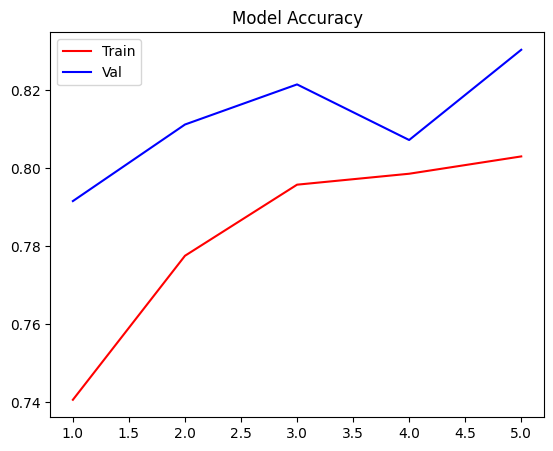

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

# Grafik Loss

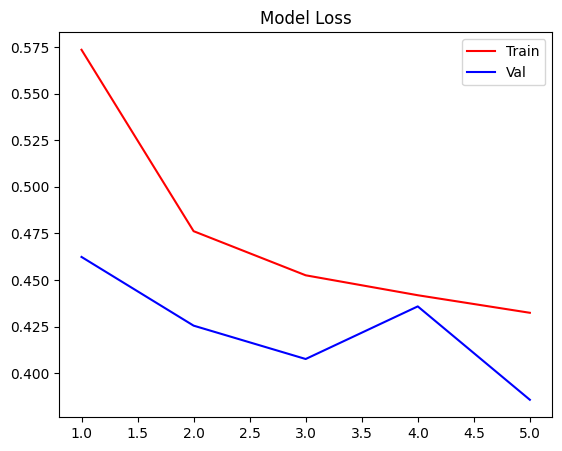

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

In [24]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [25]:
path_gambar = '/content/shells_or_pebbles_dataset/Shells/Shells (1).png'

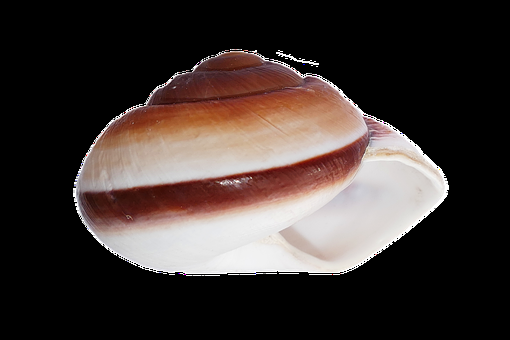

In [26]:
image = load_img(path_gambar)
image


In [27]:

bright = random_brightness(image, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

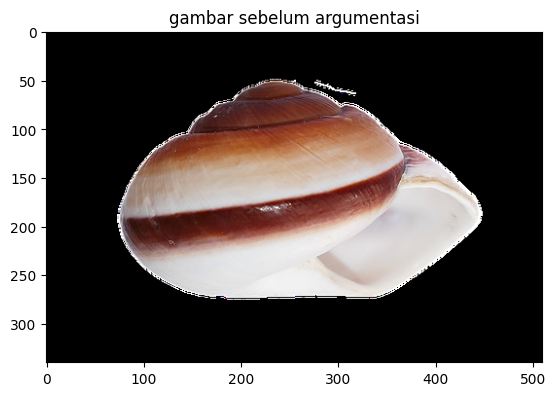

In [28]:
plt.imshow(image)
plt.title('gambar sebelum argumentasi')